In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlalchemy 
from db_connection import engine

0    MALE
Name: sex, dtype: object
sex
MALE      179
FEMALE    165
Name: count, dtype: int64


# Общая информация о дата сете 

In [2]:
dataset_info = 'SELECT * FROM palmer_penguins' 
df = pd.read_sql(dataset_info, engine)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyname            344 non-null    object 
 1   sample_number        344 non-null    int64  
 2   species              344 non-null    object 
 3   region               344 non-null    object 
 4   island               344 non-null    object 
 5   stage                344 non-null    object 
 6   individual_id        344 non-null    object 
 7   clutch_completion    344 non-null    object 
 8   date_egg             344 non-null    object 
 9   culmen_length_(mm)   344 non-null    float64
 10  culmen_depth_(mm)    344 non-null    float64
 11  flipper_length_(mm)  344 non-null    float64
 12  body_mass_(g)        344 non-null    float64
 13  sex                  344 non-null    object 
 14  delta_15_n_(o/oo)    344 non-null    float64
 15  delta_13_c_(o/oo)    344 non-null    flo

In [4]:
df.describe()

,sample_number,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),delta_15_n_(o/oo),delta_13_c_(o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,63.151163,43.924709,17.152035,200.892442,4200.872093,8.730086,-25.691855
std,40.430199,5.443765,1.969060,14.023826,799.696532,0.540630,0.779277
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460
50%,58.000000,44.400000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


# Чистка данных


Вся чиста данных была проведена предварительно, перед добавлением в базу данных. Чистка была проведена в файле db_connection.py


# Описательная статистика

## Медиана

In [5]:
desc_stat = 'SELECT "culmen_length_(mm)", "culmen_depth_(mm)", "flipper_length_(mm)", "body_mass_(g)" FROM palmer_penguins'
ds_df = pd.read_sql(desc_stat, engine)

In [6]:
ds_df

,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,44.4,17.3,197.0,4050.0
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,44.4,17.3,197.0,4050.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [7]:
ds_df.median().to_frame(name='median')

,median
culmen_length_(mm),44.4
culmen_depth_(mm),17.3
flipper_length_(mm),197.0
body_mass_(g),4050.0


## Дисперсия 

In [8]:
ds_df.var().to_frame(name='var')

,var
culmen_length_(mm),29.634577
culmen_depth_(mm),3.877197
flipper_length_(mm),196.667698
body_mass_(g),639514.543359


## Стандартное отклонение 

In [9]:
ds_df.std().to_frame(name='std')

,std
culmen_length_(mm),5.443765
culmen_depth_(mm),1.969060
flipper_length_(mm),14.023826
body_mass_(g),799.696532


# Категориальные признаки

## Половые различичия

In [10]:
sex_diff = 'SELECT sex, "culmen_length_(mm)", "culmen_depth_(mm)", "flipper_length_(mm)", "body_mass_(g)" FROM palmer_penguins'
sex_diff_df = pd.read_sql(sex_diff, engine)

sex_diff_df.groupby('sex')[['culmen_length_(mm)', 'culmen_depth_(mm)', 'flipper_length_(mm)', 'body_mass_(g)']].median()

,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g)
sex,,,,
FEMALE,42.8,17.0,193.0,3650.0
MALE,46.2,18.3,200.0,4300.0


## Виды пингвинов

### Уникальные виды пингвинов 


In [11]:
species = 'SELECT species FROM palmer_penguins'
species_df = pd.read_sql(species, engine)

species_df['species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

### Распределение по островам

#### Общее количество

In [12]:
spec_dist = 'SELECT island, species FROM palmer_penguins'
spec_dist_df = pd.read_sql(spec_dist, engine)

spec_dist_df.groupby('island')['species'].count()

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

#### Количество по видам

In [13]:
spec_dist_df.groupby('island')['species'].value_counts()

island     species                                  
Biscoe     Gentoo penguin (Pygoscelis papua)            124
           Adelie Penguin (Pygoscelis adeliae)           44
Dream      Chinstrap penguin (Pygoscelis antarctica)     68
           Adelie Penguin (Pygoscelis adeliae)           56
Torgersen  Adelie Penguin (Pygoscelis adeliae)           52
Name: count, dtype: int64

### Морфологическая разница между видами 

In [14]:
spec_diff = 'SELECT species, "culmen_length_(mm)", "culmen_depth_(mm)", "flipper_length_(mm)", "body_mass_(g)" FROM palmer_penguins'
spec_diff_df = pd.read_sql(spec_diff, engine)

spec_diff_df.groupby('species')[['culmen_length_(mm)', 'culmen_depth_(mm)', 'flipper_length_(mm)', 'body_mass_(g)']].median()

,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g)
species,,,,
Adelie Penguin (Pygoscelis adeliae),38.80,18.40,190.0,3700.0
Chinstrap penguin (Pygoscelis antarctica),49.55,18.45,196.0,3700.0
Gentoo penguin (Pygoscelis papua),47.25,15.00,216.0,5000.0


### Трофический уровень (δ¹⁵N)

In [15]:
delta_15 = 'SELECT species, "delta_15_n_(o/oo)" FROM palmer_penguins'
delta_15_df = pd.read_sql(delta_15, engine)

delta_15_df.groupby('species')['delta_15_n_(o/oo)'].median()

species
Adelie Penguin (Pygoscelis adeliae)          8.850065
Chinstrap penguin (Pygoscelis antarctica)    9.370840
Gentoo penguin (Pygoscelis papua)            8.256790
Name: delta_15_n_(o/oo), dtype: float64

По этим данным становится понятно, что все виды находятся примерно на одном трофическом уровне

## Географические особенности

### На каком острове лучше кладка яиц

Text(0, 0.5, 'Количество')

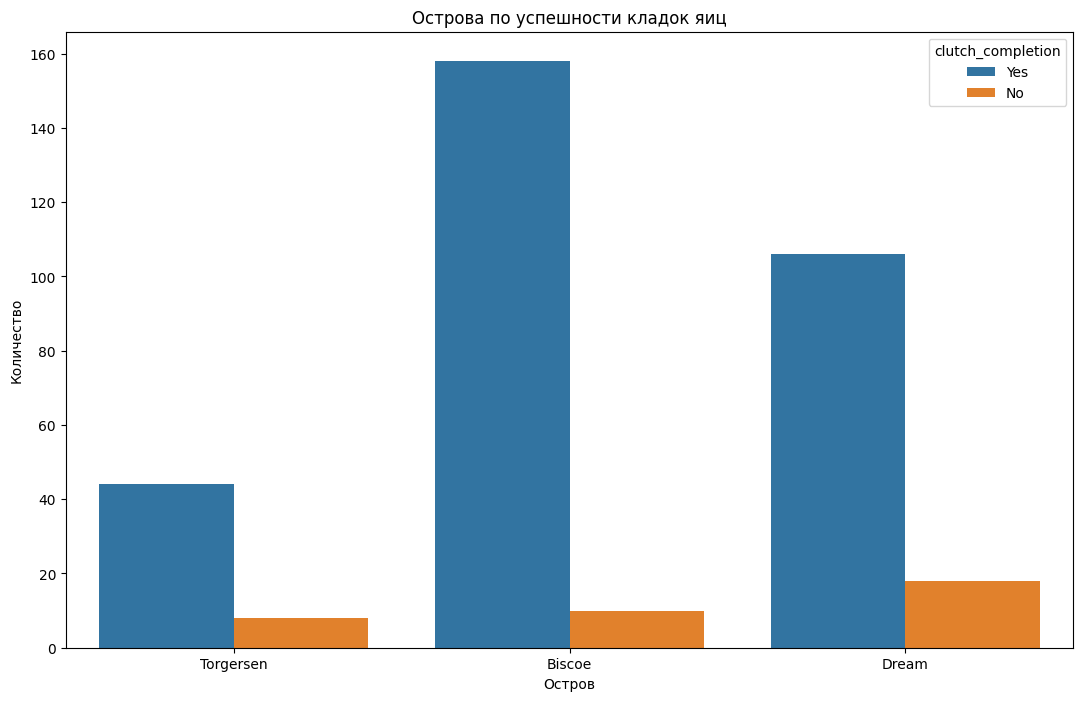

In [16]:
island_clutch = 'SELECT island, clutch_completion FROM palmer_penguins'
isl_cltch_df = pd.read_sql(island_clutch, engine)
 

plt.figure(figsize = (13,8))
sns.countplot(data = isl_cltch_df, x = 'island', hue = 'clutch_completion')
plt.title('Острова по успешности кладок яиц')
plt.xlabel('Остров')
plt.ylabel('Количество')

### Проведя небольшой речерч, нашел некоторые инсайты: 
- Остров Biscoe является самым большим по площади (478.38 км²), что означает больше ресурсов -> ожидаемый высокий результат
- Остров Torgersen меньше по площади (305 км²), но имеет самый низкий показатель. Аномалия, что может говорить о маленьком количестве ресурсов, пищи или экологические факторы (хищники, другие виды животных)
- Остров Dream очень маленкий (0.7 км²), но показатели гораздо выше, чем чем у Torgersen, что может говорить о качестве окружающей среды, доступности пищи, отсутсвие конкуренции


### Острова по средней массе тела 

Text(0, 0.5, 'Масса')

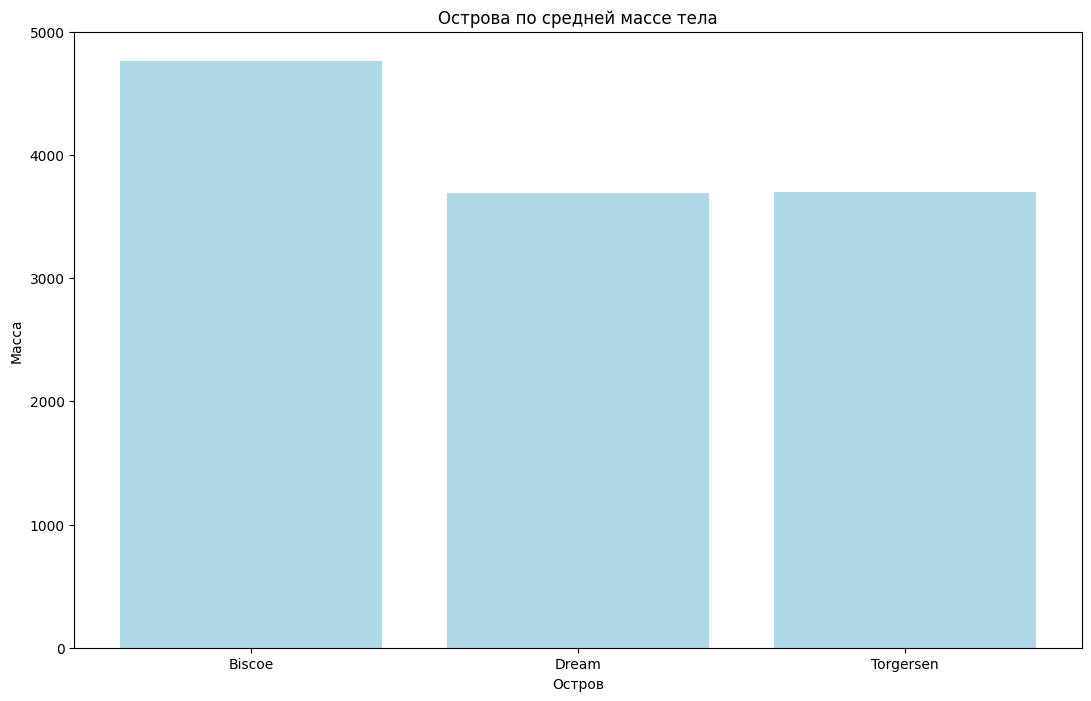

In [17]:
island_mass = 'SELECT island, "body_mass_(g)" FROM palmer_penguins'
island_mass_df = pd.read_sql(island_mass, engine)
mass_grby = island_mass_df.groupby('island')['body_mass_(g)'].median()

plt.figure(figsize = (13,8))
plt.bar(x = mass_grby.index, height = mass_grby.values, color = 'lightblue')
plt.title('Острова по средней массе тела')
plt.xlabel('Остров')
plt.ylabel('Масса')

### Перевес на осторве Biscoe
Необходимо проверить количество самих пингвинов, что бы посмотреть, перевес из-за количества или все таки влияет остров 


In [18]:
island_mass_df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

### Почему лидирует остров Biscoe
<!-- теперь видно, что на острове Torgersen меньше всего, но даже при этом условии почти одинаковые данные с осторов Dream, хотя перевес почти в 2.5 раза -->
Как видно из раздела "Распределение по островам" и "Морфологическая разница между видами", только на этом острове есть вид Gentoo penguin (Pygoscelis papua), который обладает самой высокой средней массой тела.

## Связь между морфологией и кладкой яиц


Text(0.5, 1.0, 'Успешность кладки по массе тела')

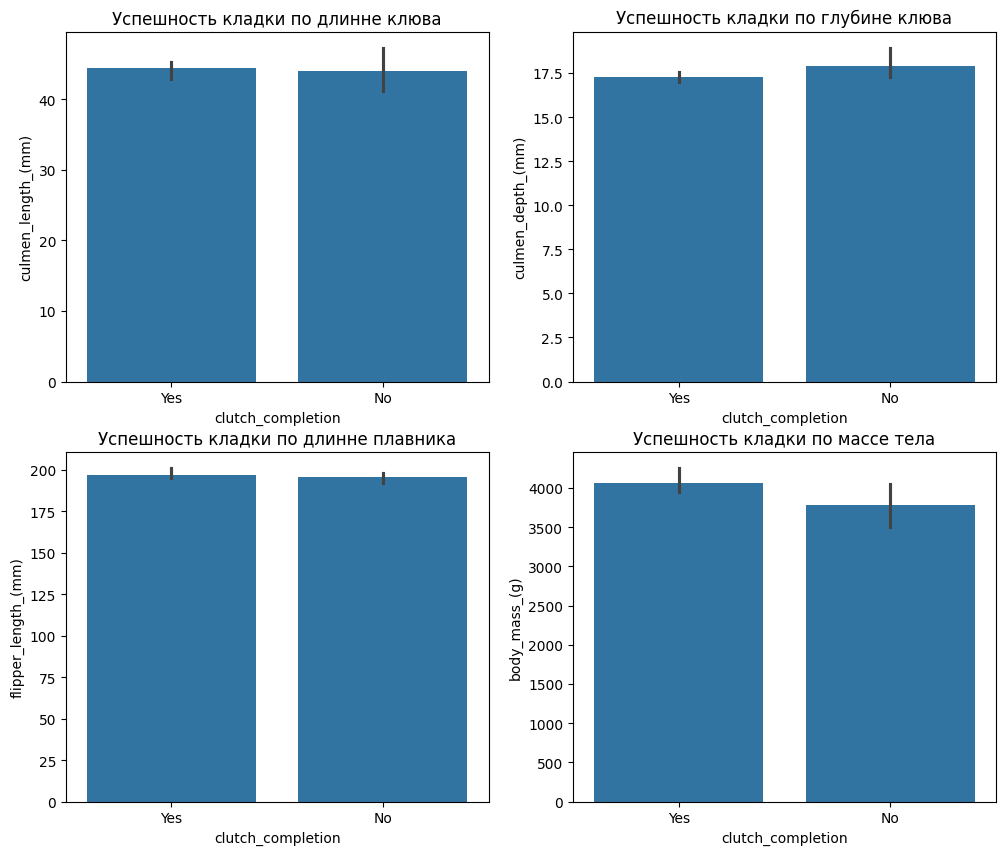

In [19]:
culmen_clutch = 'SELECT clutch_completion, "culmen_length_(mm)", "culmen_depth_(mm)", "flipper_length_(mm)", "body_mass_(g)" FROM palmer_penguins'
culmen_clutch_df = pd.read_sql(culmen_clutch, engine)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

sns.barplot(data = culmen_clutch_df,
           x = 'clutch_completion', 
           y = 'culmen_length_(mm)',
           estimator = 'median',
            ax = axes[0,0]).set_title('Успешность кладки по длинне клюва')

sns.barplot(data = culmen_clutch_df,
           x = 'clutch_completion', 
           y = 'culmen_depth_(mm)',
           estimator = 'median',
            ax = axes[0,1]).set_title('Успешность кладки по глубине клюва')

sns.barplot(data = culmen_clutch_df,
           x = 'clutch_completion', 
           y = 'flipper_length_(mm)',
           estimator = 'median',
            ax = axes[1,0]).set_title('Успешность кладки по длинне плавника')

sns.barplot(data = culmen_clutch_df,
           x = 'clutch_completion', 
           y = 'body_mass_(g)',
           estimator = 'median',
            ax = axes[1,1]).set_title('Успешность кладки по массе тела')

### Данное сравнение морфологии пингвинов (длинна, глубина клюва, длинна крыльев, масса тела) не показало заметных различий. 
Это указывает на то, физиологические показатели не влияют на успешность кладки. На ее успешность, скорее всего, влияют другие факторы, такие, как условия среды, разнообразие и доступность пищи.

# Выводы 


## Общая структура данных
- В данном сете данных 16 колонок и 344 строки. Была удалена колонка Comments, все названия колонок были приведены к нижнему регистру, все пропуски в колонке sex были заполнены на моду данной колонки.

## Ключевые наблюдения 

- Масса тела ожидаемо различается между полами, самцы крупнее и тяжелее самок, также между видами пингвинов.
- Остров Biscoe является лидером по населению и успешностью кладки.
    

## Необнаруженные зависимости

- Проверялась зависимость успешности кладки от морфологических показателей, но зависимости не выявлено.

## Географические инсайты 

- Остров Biscoe, вероятно, имеет больше ресурсов и благоприятные экологические факторы, которые и делают этот остров наилучшим среди всех.
- Остров Torgersen является худшим среди всех, маленькое население, плохой уровень кладки, вероятно, наихудшее качество экологии, недостаток ресурсов.
- Остров Dream показал, что площадь не является главным показателем, при маленькой площади, насление острова гораздо выше, чем у Torgersen, показывая на вероятное, высокий уровень экологии, достаток ресурсов.

Все это наталкивает на следующие выводы:
- Размер территории не гарантирует успешность размножения. Большее влияние имеет доступность пищи и экологические условия.

## Заключение

Данный анализ помог понять, что экологические факторы оказывают куда большее влияние, чем морфология или площадь острова. Проект показал, что при работе с биологическими данными важно учитывать не только числовые показатели, но и реальные условия среды, в которых живут животные, поэтому важно проводить ресерч, выясняя реальные данные, не опираясь исключительно на числовые данные дата сета. 